# Koder brugt i videoer til flipped classroom 1

In [10]:
# Indlæs data og inspicer
import pandas as pd

ess18_trst = pd.read_csv("https://github.com/CALDISS-AAU/course_ndms-I/raw/master/datasets/ESS2018DK_trst-subset_raw.csv")
ess18_trst.head()

,idno,cntry,ppltrst,trstprl,trstlgl,trstplc,trstplt,trstprt,trstep,trstun
0,110,DK,8,8,Complete trust,Complete trust,7,8,5,8
1,705,DK,5,6,8,9,3,3,4,1
2,1327,DK,5,7,5,2,5,6,Don't know,Don't know
3,3760,DK,7,5,9,9,5,5,5,8
4,4658,DK,8,8,8,8,6,6,3,Don't know


## Erstatning af værdier

In [11]:
# ess18_trst['trstprl'].mean() # Giver fejl

In [12]:
ess18_trst['trstprl'].value_counts() # Variabel indeholder tekst-værdier

7                  302
8                  302
5                  242
6                  205
9                  120
4                  116
3                  102
Complete trust      67
2                   57
No trust at all     31
1                   16
Don't know          12
Name: trstprl, dtype: int64

In [4]:
ess18_trst['trstprl'].replace({"Complete trust": 10}).value_counts() # Samme optælling med erstatning - OBS: ændrer ikke data

7                  302
8                  302
5                  242
6                  205
9                  120
4                  116
3                  102
10                  67
2                   57
No trust at all     31
1                   16
Don't know          12
Name: trstprl, dtype: int64

In [5]:
ess18_trst['trstprl'].replace({"Complete trust": 10, "No trust at all": 0}).value_counts() # Samme optælling med erstatning - OBS: ændrer ikke data

7             302
8             302
5             242
6             205
9             120
4             116
3             102
10             67
2              57
0              31
1              16
Don't know     12
Name: trstprl, dtype: int64

In [15]:
ess18_trst['trstprl'] = ess18_trst['trstprl'].replace({"Complete trust": 10, "No trust at all": 0}) # Erstatter tekstværdier med tal

**Erstatning af værdier med brug af dictionary**

In [14]:
trstval_dict = {"Complete trust": 10, "No trust at all": 0} #

ess18_trst['trstlgl'] = ess18_trst['trstlgl'].replace(trstval_dict)

ess18_trst['trstlgl'].value_counts()

9             405
8             377
10            225
7             213
6             120
5              98
4              47
3              39
Don't know     15
0              13
2              13
1               5
No answer       1
Refusal         1
Name: trstlgl, dtype: int64

In [25]:
trstvars = ['trstplc', 'trstplt', 'trstprt', 'trstep', 'trstun']

for var in trstvars:
    ess18_trst[var] = ess18_trst[var].replace(trstval_dict)

In [26]:
ess18_trst['trstun'].value_counts()

8             339
7             284
5             229
6             204
9             138
Don't know     95
4              83
10             67
3              61
2              32
0              20
1              17
Refusal         3
Name: trstun, dtype: int64

# Behandling af missingværdier


In [16]:
import numpy as np

ess18_trst['trstlgl'].value_counts() # Variabel indeholder missing

9             405
8             377
10            225
7             213
6             120
5              98
4              47
3              39
Don't know     15
0              13
2              13
1               5
No answer       1
Refusal         1
Name: trstlgl, dtype: int64

I python kodes missing til `NaN`. Denne værdi kan hentes fra pakken `numpy`(`np`)

In [17]:
ess18_trst['trstlgl'] = ess18_trst['trstlgl'].replace({"Don't know": np.nan, "No answer": np.nan, "Refusal": np.nan}) # Erstat med missing

In [18]:
ess18_trst['trstlgl'].value_counts()

9     405
8     377
10    225
7     213
6     120
5      98
4      47
3      39
0      13
2      13
1       5
Name: trstlgl, dtype: int64

**Erstat missing med dictionary**

In [20]:
misval_dict = {"Don't know": np.nan, "No answer": np.nan, "Refusal": np.nan}

ess18_trst = ess18_trst.replace(misval_dict) # Erstatter missing i hele datasættet

In [21]:
ess18_trst['trstprl'].isna() # Er værdien missing?

0       False
1       False
2       False
3       False
4       False
        ...  
1567    False
1568    False
1569    False
1570    False
1571    False
Name: trstprl, Length: 1572, dtype: bool

In [22]:
ess18_trst['trstprl'].notna() # Er værdien ikke missing?

0       True
1       True
2       True
3       True
4       True
        ... 
1567    True
1568    True
1569    True
1570    True
1571    True
Name: trstprl, Length: 1572, dtype: bool

In [23]:
ess18_trst['trstprl'].isna().sum() # Optælling: hvor mange missing?

12

In [24]:
ess18_trst.loc[ess18_trst['trstprl'].isna(), :] # Subset - behold kun missing i trstprl

,idno,cntry,ppltrst,trstprl,trstlgl,trstplc,trstplt,trstprt,trstep,trstun
279,87225,DK,3,NaN,7,9,NaN,NaN,9,9
591,104254,DK,Most people can be trusted,NaN,NaN,3,3,2,3,1
645,106796,DK,6,NaN,4,6,NaN,NaN,NaN,NaN
664,107444,DK,6,NaN,2,6,6,6,6,NaN
677,108140,DK,5,NaN,8,8,NaN,NaN,NaN,7
817,114277,DK,NaN,NaN,9,9,4,4,NaN,6
936,120170,DK,6,NaN,NaN,8,NaN,NaN,7,NaN
952,120972,DK,8,NaN,8,7,7,7,4,7
1049,125805,DK,Most people can be trusted,NaN,8,8,6,NaN,8,8
1081,127056,DK,9,NaN,7,7,5,5,Complete trust,9


In [25]:
ess18_trst.dropna() # læg mærke til rækkenumre - nulstilles ikke (række beholder oprindeligt rækkenummer)

,idno,cntry,ppltrst,trstprl,trstlgl,trstplc,trstplt,trstprt,trstep,trstun
0,110,DK,8,8,10,Complete trust,7,8,5,8
1,705,DK,5,6,8,9,3,3,4,1
3,3760,DK,7,5,9,9,5,5,5,8
5,5816,DK,7,5,6,6,4,6,3,7
6,7251,DK,5,5,6,8,5,4,7,6
...,...,...,...,...,...,...,...,...,...,...
1566,149856,DK,7,9,7,8,6,6,6,4
1567,149977,DK,8,6,9,9,5,4,6,8
1568,150131,DK,Most people can be trusted,6,8,8,6,6,5,8
1569,150359,DK,8,5,10,9,5,2,5,8


# Konvertering af datatype (casting)


In [27]:
ess18_trst['trstprl'].value_counts() #ser rigtig ud

7     302
8     302
5     242
6     205
9     120
4     116
3     102
10     67
2      57
0      31
1      16
Name: trstprl, dtype: int64

In [29]:
# ess18_trst['trstprl'].mean() # Men vi kan ikke lave udregninger

In [46]:
ess18_trst['trstprl'].dtypes # Tjek typen - 'o' er kort for 'object'

dtype('O')

En 'object' datatype er mere eller mindre Python's svar på "jeg ved det ikke"-typen. Datatypen kan indeholde både tekst og numre, men kan hurtigt give rod. Det er derfor bedst at tvinge den om til den rigtige type.

In [30]:
ess18_trst['trstprl'].astype('float') # Konverter til float (decimaltal) - ændrer ikke data

0       8.0
1       6.0
2       7.0
3       5.0
4       8.0
       ... 
1567    6.0
1568    6.0
1569    5.0
1570    8.0
1571    8.0
Name: trstprl, Length: 1572, dtype: float64

In [51]:
ess18_trst['trstprl'] = ess18_trst['trstprl'].astype('float') # Konverter til float (decimantal) - ændrer data ved at overskrive variablen

In [52]:
trstvars = ['trstplc', 'trstplt', 'trstprt', 'trstep', 'trstun'] # Dan liste over variable, som skal tvinges til float

for var in trstvars: # Tving variable i liste til float gennem for loop
    ess18_trst[var] = ess18_trst[var].astype('float')

In [53]:
ess18_trst['trstprl'].mean() # Der kan nu udregnes middelværdi

6.166666666666667

# Merge/join

In [101]:
ess18_trst.head()

,idno,cntry,ppltrst,trstprl,trstlgl,trstplc,trstplt,trstprt,trstep,trstun
0,110,DK,8,8.0,10,10.0,7.0,8.0,5.0,8.0
1,705,DK,5,6.0,8,9.0,3.0,3.0,4.0,1.0
2,1327,DK,5,7.0,5,2.0,5.0,6.0,NaN,NaN
3,3760,DK,7,5.0,9,9.0,5.0,5.0,5.0,8.0
4,4658,DK,8,8.0,8,8.0,6.0,6.0,3.0,NaN


In [35]:
ess18_bcg = pd.read_csv('https://github.com/CALDISS-AAU/course_ndms-I/raw/master/datasets/ESS2018DK_bcg-subset_raw.csv', index_col = 0) # Indlæser datasæt med baggrundsoplysninger

In [36]:
ess18_bcg.head()

,idno,gndr,agea,region,prtvtddk,edlvddk,infqbst,grspnum
0,110,Male,69,DK04,Socialdemokratiet - The Social democrats,Kort videregående uddannelse af op til 2-3 års...,Don't know,NaN
1,705,Male,60,DK05,Det Konservative Folkeparti - Conservative Peo...,Kort videregående uddannelse af op til 2-3 års...,Annual,NaN
2,1327,Male,18,DK02,Not applicable,Folkeskole 9.-10. klasse,No answer,NaN
3,3760,Male,16,DK04,Not applicable,Folkeskole 9.-10. klasse,Weekly,200.0
4,4658,Female,62,DK02,Refusal,Kort videregående uddannelse af op til 2-3 års...,Annual,NaN


De to datasæt indeholder oplysninger om de samme respondenter. Respondenterne kan identificeres gennem deres id-nummer (`idno`).

Nedenstående viser de forskellige join-typer, som man sammensætter data efter.

![image.png](https://www.ionos.ca/digitalguide/fileadmin/DigitalGuide/Screenshots_2018/Outer-Join.jpg)

Pandas dataframes sættes sammen med `pd.merge()`. Se evt. dokumentationen ved at skrive `?pd.merge`

In [37]:
#?pd.merge # 

In [38]:
ess18_merged = pd.merge(ess18_trst, ess18_bcg, on = 'idno', how = 'left') # Merger datasæt på idno med left-join

In [39]:
ess18_merged.head()

,idno,cntry,ppltrst,trstprl,trstlgl,trstplc,trstplt,trstprt,trstep,trstun,gndr,agea,region,prtvtddk,edlvddk,infqbst,grspnum
0,110,DK,8,8,10,Complete trust,7,8,5,8,Male,69,DK04,Socialdemokratiet - The Social democrats,Kort videregående uddannelse af op til 2-3 års...,Don't know,NaN
1,705,DK,5,6,8,9,3,3,4,1,Male,60,DK05,Det Konservative Folkeparti - Conservative Peo...,Kort videregående uddannelse af op til 2-3 års...,Annual,NaN
2,1327,DK,5,7,5,2,5,6,NaN,NaN,Male,18,DK02,Not applicable,Folkeskole 9.-10. klasse,No answer,NaN
3,3760,DK,7,5,9,9,5,5,5,8,Male,16,DK04,Not applicable,Folkeskole 9.-10. klasse,Weekly,200.0
4,4658,DK,8,8,8,8,6,6,3,NaN,Female,62,DK02,Refusal,Kort videregående uddannelse af op til 2-3 års...,Annual,NaN


# Visualisering

In [40]:
ess18_merged.head()

,idno,cntry,ppltrst,trstprl,trstlgl,trstplc,trstplt,trstprt,trstep,trstun,gndr,agea,region,prtvtddk,edlvddk,infqbst,grspnum
0,110,DK,8,8,10,Complete trust,7,8,5,8,Male,69,DK04,Socialdemokratiet - The Social democrats,Kort videregående uddannelse af op til 2-3 års...,Don't know,NaN
1,705,DK,5,6,8,9,3,3,4,1,Male,60,DK05,Det Konservative Folkeparti - Conservative Peo...,Kort videregående uddannelse af op til 2-3 års...,Annual,NaN
2,1327,DK,5,7,5,2,5,6,NaN,NaN,Male,18,DK02,Not applicable,Folkeskole 9.-10. klasse,No answer,NaN
3,3760,DK,7,5,9,9,5,5,5,8,Male,16,DK04,Not applicable,Folkeskole 9.-10. klasse,Weekly,200.0
4,4658,DK,8,8,8,8,6,6,3,NaN,Female,62,DK02,Refusal,Kort videregående uddannelse af op til 2-3 års...,Annual,NaN


<AxesSubplot:xlabel='trstprl', ylabel='grspnum'>

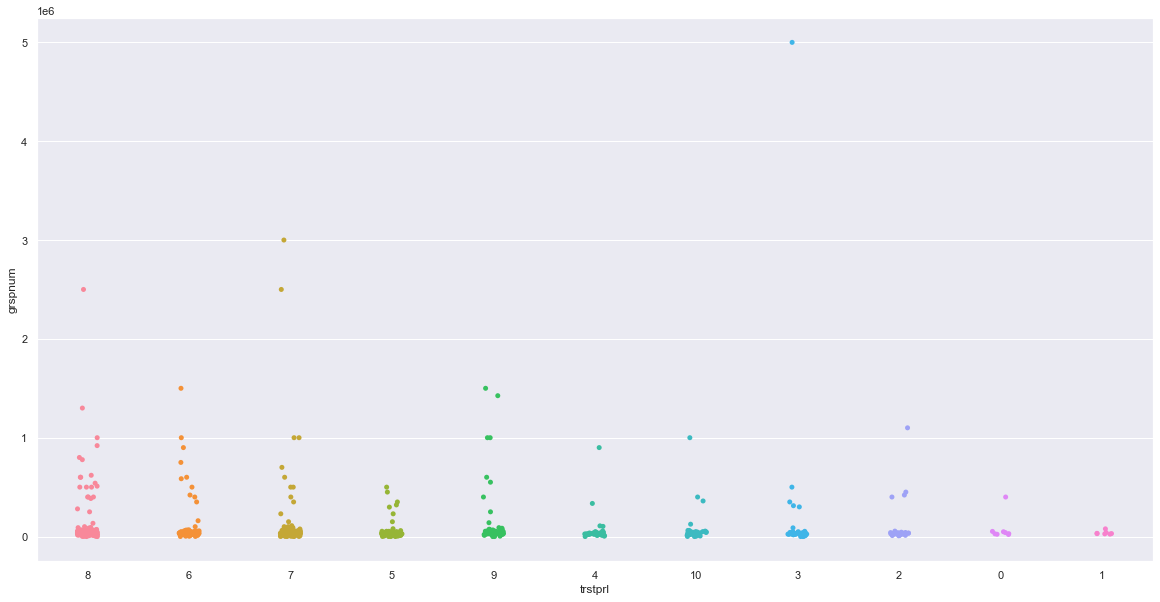

In [41]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.set(rc={'figure.figsize':(20,10)})

sns.stripplot(data = ess18_merged, x = 'trstprl', y = 'grspnum') # Dan stripplot - en form for scatterplot til kategoriske variable

In [43]:
ess18_merged['infqbst'].value_counts() # Indeholder forskellige måleenheder

Monthly           1285
Annual              99
Not applicable      77
No answer           47
Weekly              35
Don't know          18
Refusal             11
Name: infqbst, dtype: int64

In [44]:
ess18_monthly = ess18_merged.loc[ess18_merged['infqbst'] == 'Monthly'] # Behold kun respondenter, som har opgivet løn på månedsbasis

<AxesSubplot:xlabel='trstprl', ylabel='grspnum'>

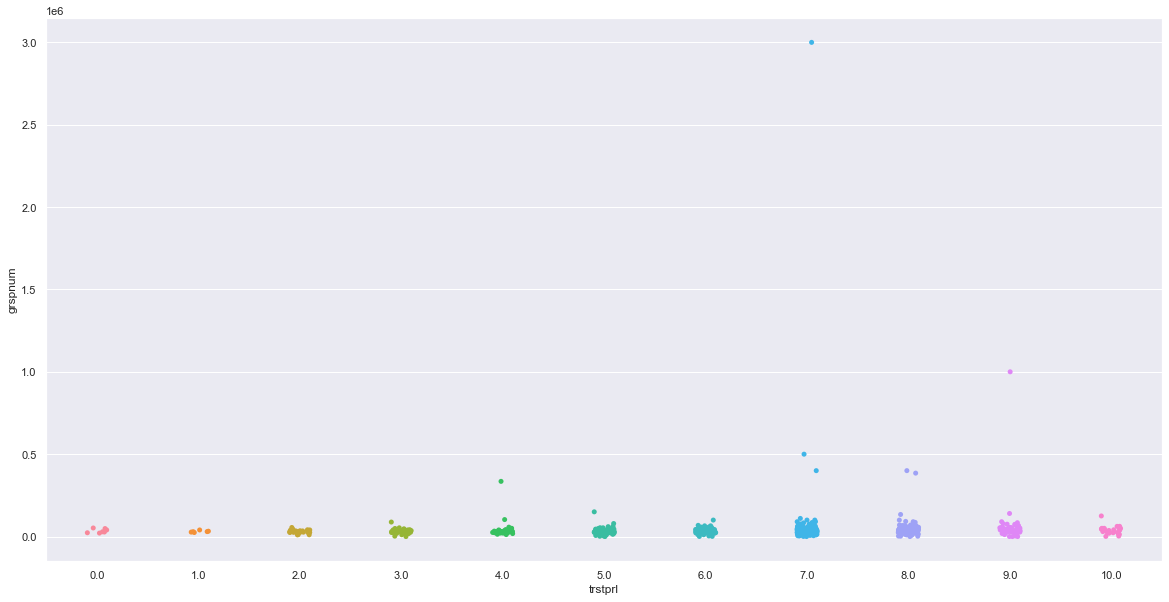

In [136]:
sns.stripplot(data = ess18_monthly, x = 'trstprl', y = 'grspnum') # Dan samme plot igen

In [45]:
ess18_monthly['grspnum'].describe() # Der er stadig ekstreme værdier

count    7.150000e+02
mean     4.368549e+04
std      1.221933e+05
min      0.000000e+00
25%      2.600000e+04
50%      3.200000e+04
75%      4.100000e+04
max      3.000000e+06
Name: grspnum, dtype: float64

In [46]:
ess18_monthly.loc[ess18_monthly['grspnum'] > 100000].shape # Hvor mange tjener mere end 100000 om måneden?

(14, 17)

In [47]:
ess18_monthly = ess18_monthly.loc[ess18_monthly['grspnum'] < 100000] # De, som tjener mere end 100000, frasorteres

<AxesSubplot:xlabel='trstprl', ylabel='grspnum'>

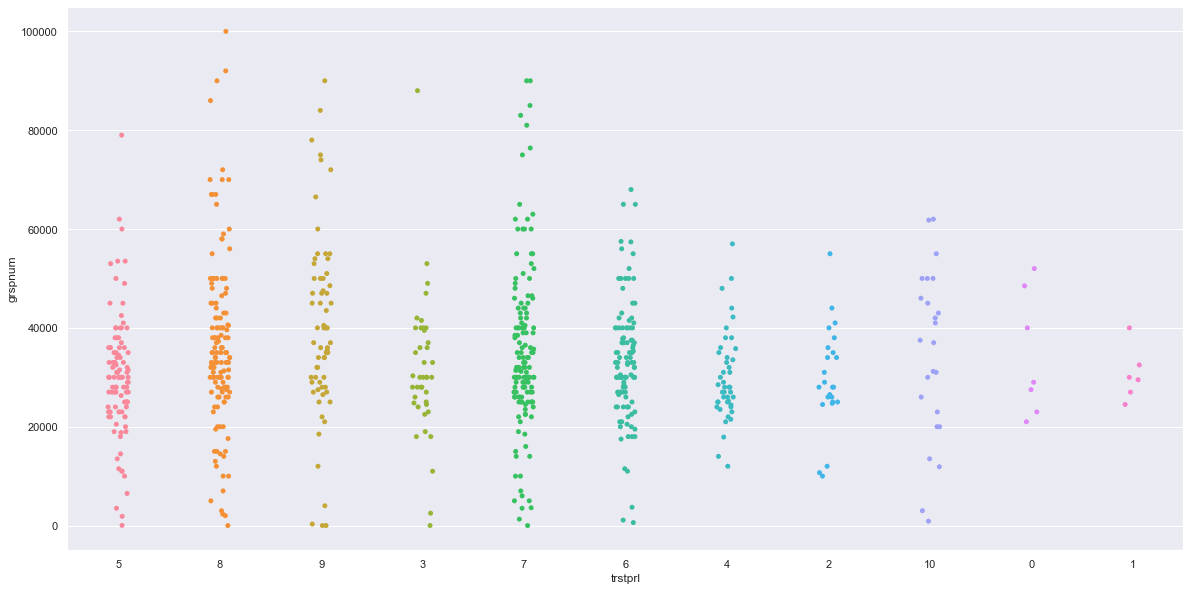

In [48]:
sns.stripplot(data = ess18_monthly, x = 'trstprl', y = 'grspnum')

<AxesSubplot:xlabel='trstprl', ylabel='grspnum'>

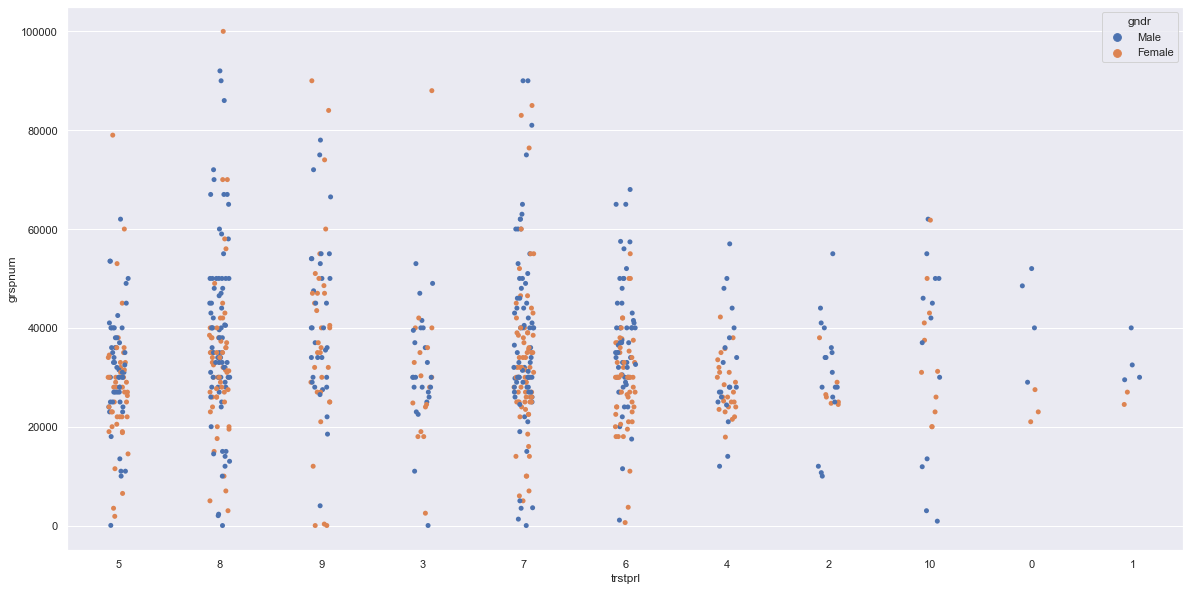

In [49]:
sns.stripplot(data = ess18_monthly, x = 'trstprl', y = 'grspnum', hue = 'gndr') # Farvelæg prikker efter køn

`seaborn` (som bliver brugt til at danne plots her) bygger ovenpå `matplotlib`. Når et plot dannes med `seaborn`, dannes et `pyplot` objekt. Dette objekt kan ændres på forskellig vis til at tilføje oplysninger til plottet.

Tilføjelser til et `pyplot` skal helst køres i samme celle, som plottet dannes.

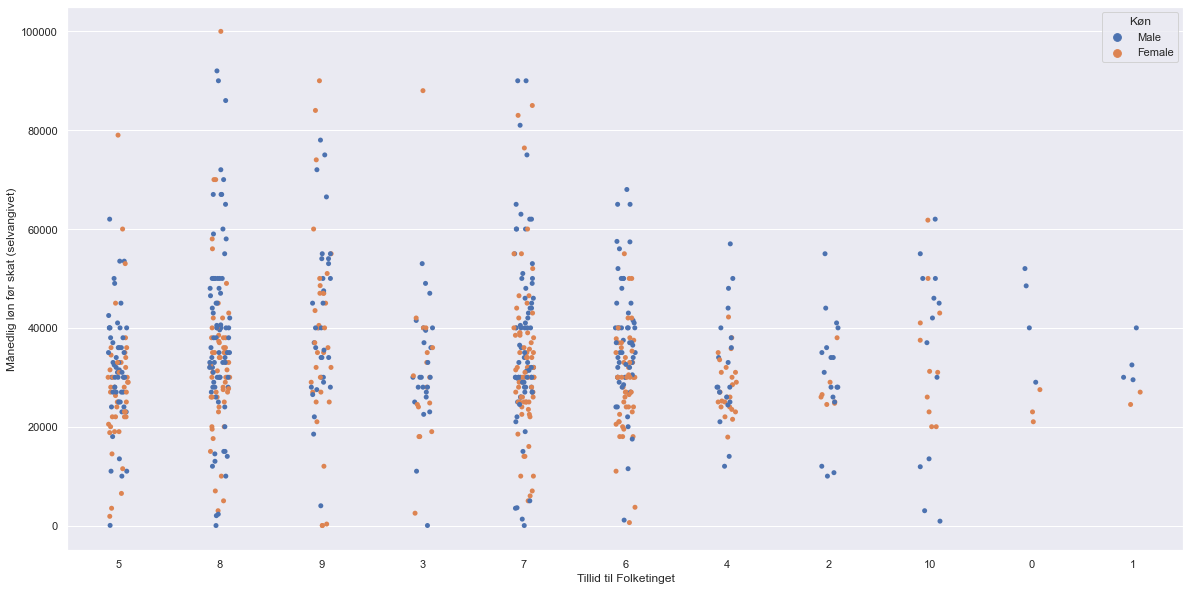

In [50]:
sns.stripplot(data = ess18_monthly, x = 'trstprl', y = 'grspnum', hue = 'gndr')
plt.xlabel("Tillid til Folketinget") # Label til x-akse
plt.ylabel("Månedlig løn før skat (selvangivet)") # Label til y-akse
plt.legend(title = "Køn") # Overskrift på legend

Plottet kan gemmes med `.savefig([filnavn])`. Denne linje skal også køres i samme celle, som plottet bliver lavet.

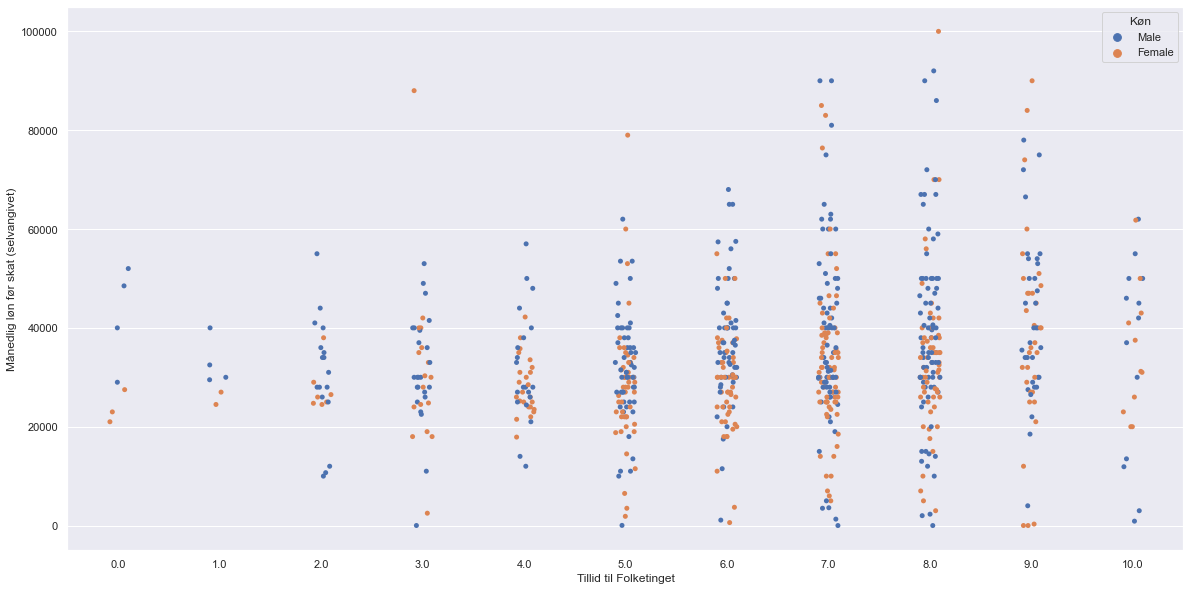

In [147]:
sns.stripplot(data = ess18_monthly, x = 'trstprl', y = 'grspnum', hue = 'gndr')
plt.xlabel("Tillid til Folketinget")
plt.ylabel("Månedlig løn før skat (selvangivet)")
plt.legend(title = "Køn")
plt.savefig('ess18_trst-pay.png', dpi = 200)